In [907]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
from scipy.spatial import distance
import random
from sklearn import datasets
from sklearn.datasets import make_blobs

# **K-Mean from scratch**

 **Dataset1: blobs dataset**

In [908]:
# Dataset1: blobs dataset
n_samples = 300
random_state = 67

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

In [909]:
def euclidean_distance(data, centroids):
 return np.sqrt(np.sum((centroids - data)**2, axis=1))

In [910]:
 def initialize_centroids(k, data):
  # This method initializes the centroids randomly from the data points.
  centroids = np.array([])
  data_min, data_max = np.min(data, axis=0),np.max(data, axis=0) #take the range of the data

  for i in range(k):
    #take 2 random valuse in the range of the data for each cluster
    initial_centroid = np.random.uniform(data_min, data_max, size=2)
    centroids = np.append(centroids,initial_centroid,axis=0) #store the centroid

  return np.reshape(centroids,[k,2]) # reshape the array

In [911]:
def distance_matrix(data, centroids):
    # Use cdist for efficient distance calculation

    # Initialize an empty list to store distances
    dis_matrix_list = []
    for i in range(len(data)):
        distances = cdist([data[i]], centroids, metric='euclidean')[0]
        dis_matrix_list.append(distances)

    # Convert the list to a NumPy array
    dis_matrix = np.array(dis_matrix_list)
    return dis_matrix

In [912]:
def assign_clusters(distance_matrix):
    # Use argmin to find the index of the minimum distance for each item
    clusters = np.argmin(distance_matrix, axis=1)#np.argmin is to find the index of the minimum distance for each item
    return clusters

In [913]:
def update_centroid(cluster):
    # Use NumPy functions for efficiency
    cluster_mean = np.mean(cluster, axis=0)
    return cluster_mean

In [914]:
def compute_centroids(data, k, clusters):
    upCen = np.empty((k, 2))

    for i in range(k):
        cluster_indices = np.where(clusters == i)[0]
        cluster_data = data[cluster_indices]

        # Check if the cluster is not empty before updating the centroid
        if len(cluster_data) > 0:
            cent = update_centroid(cluster_data)
            upCen[i] = cent

    return upCen

In [915]:
def label_the_data(data, clusters):
    # Add labels to the data and reshape the array
    labels = np.column_stack((data, clusters))
    return labels

In [916]:

# Define colors for clusters and centroids
colorsClusters = ['blue', 'green', 'purple']
colorsCentroid = [(0.0, 0.0, 0.5, 1.0), (0.0, 0.5, 0.0, 1.0)]


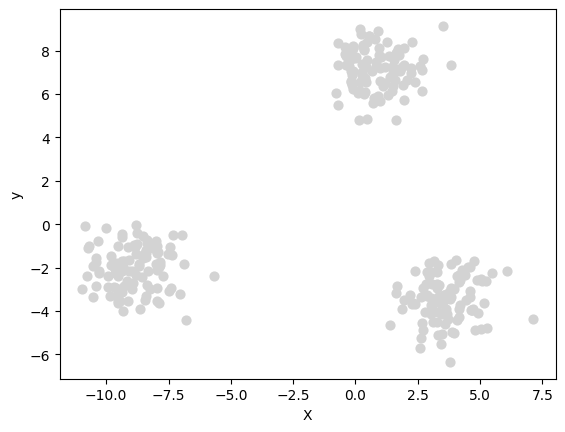

Number of iteration: 1

update the centroid :



/tmp/ipykernel_47/2811351897.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1],c=y ,s=40, cmap=cm.colors.ListedColormap(colorsClusters))


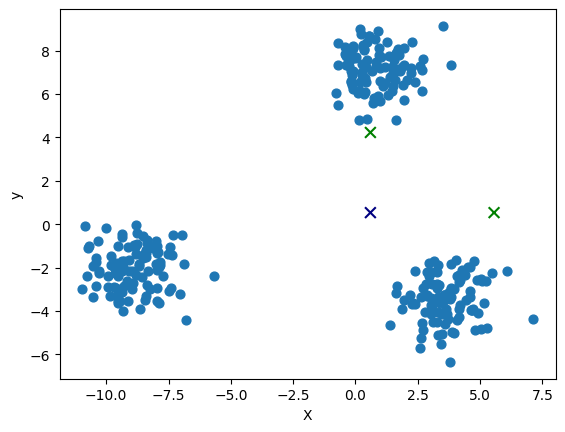


assign point to the clusters :



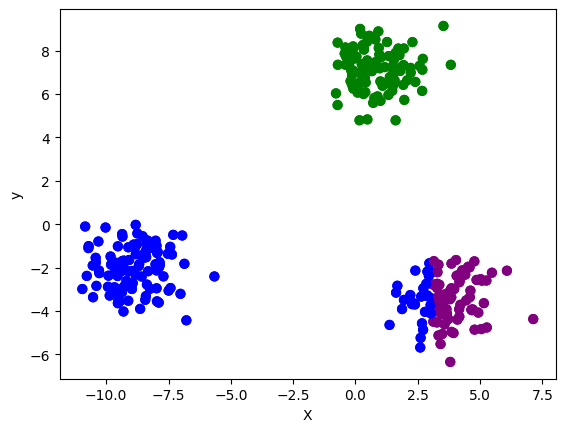

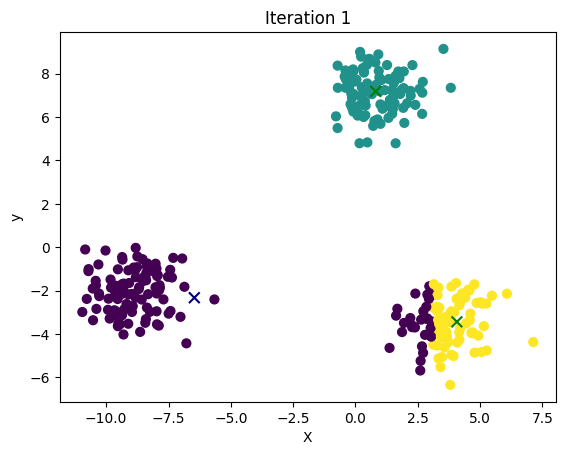

Number of iteration: 2

update the centroid :



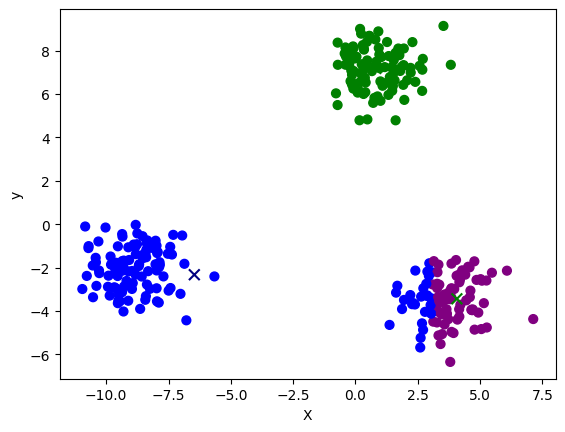


assign point to the clusters :



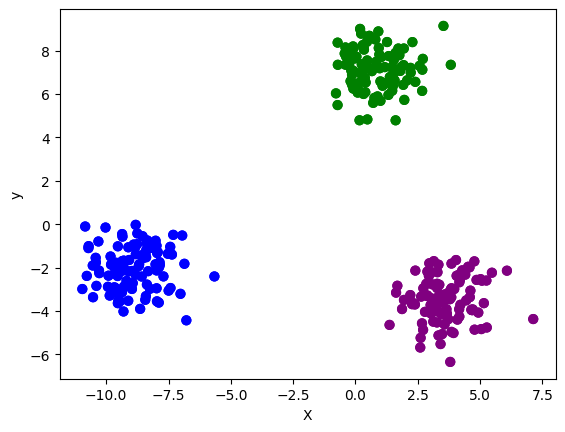

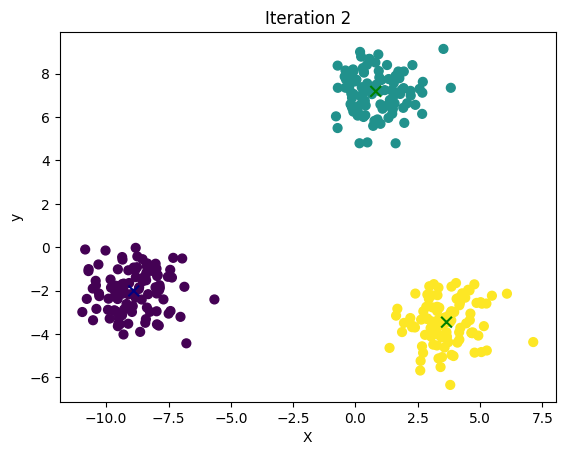

Number of iteration: 3

update the centroid :



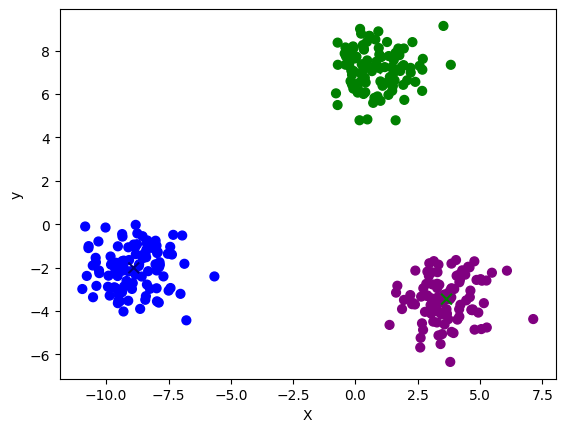


assign point to the clusters :



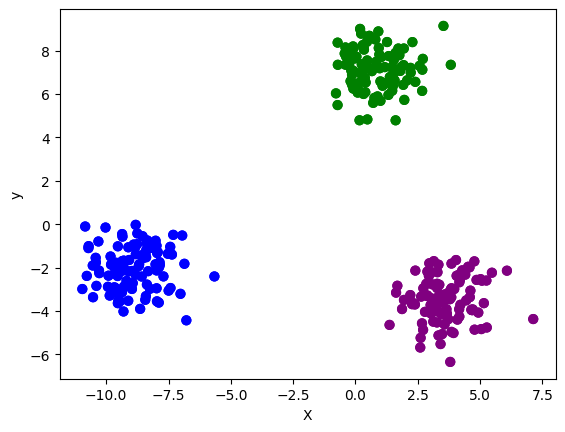

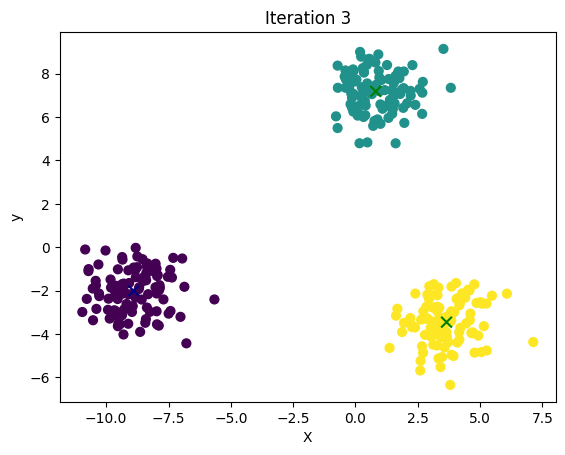

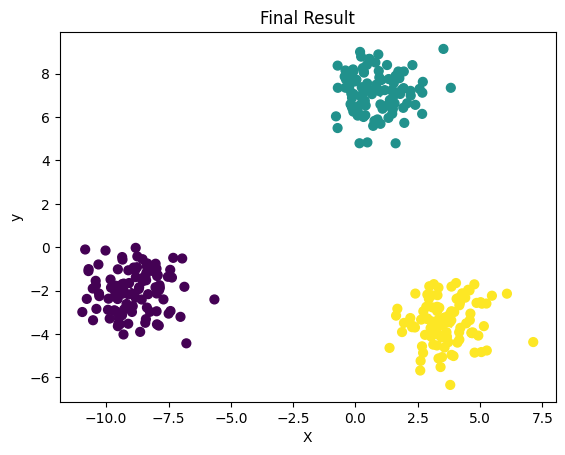

In [917]:
def KMeans(X, k, t=10):
  # Initialize centroids randomly
    centroids = initialize_centroids(k, X)

    # Plot initial centroids
    # to plot the centroids in different colors
    c_ = np.arange(start=1, stop=k+1, step=1)
    plt.scatter(X[:, 0], X[:, 1], s=40, color='lightgray')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

    prev_clusters = np.zeros(len(X))# Initialize prev_clusters before the loop
    clusters = None# Initialize clusters

    for iteration in range(1, t + 1):
        print("Number of iteration:", iteration)
        prev_clusters = clusters  # store the previous cluster
        centroids = compute_centroids(X, k, clusters)

        # plot the updated centroid
        print("\nupdate the centroid :\n")
        plotCentroid(X, clusters, centroids, k)

        dis_matrix = distance_matrix(X, centroids)
        clusters = assign_clusters(dis_matrix)
        centroids = np.array([update_centroid(X[clusters == i]) for i in range(k)])

        labels = label_the_data(X, clusters)

        # plot the clusters
        print("\nassign point to the clusters :\n")
        plotCluster(X, clusters, centroids, k)

        # Plot updated centroids and clusters
        plt.title(f'Iteration {iteration}')
        c_ = np.arange(start=1, stop=k + 1, step=1)
        plt.scatter(X[:, 0], X[:, 1], s=40, c=clusters, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c=c_, cmap=cm.colors.ListedColormap(colorsCentroid))
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()

        if not not_equal(clusters, prev_clusters):
            break
        prev_clusters = clusters
     # Plot final result
    plt.title('Final Result')
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=40, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=60, c=np.arange(len(centroids)), cmap='viridis')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

    return clusters
# Assuming you want to create 3 clusters (you can change the number as needed)
k = 3
t = 10  # Number of iterations

# Call KMeans function with your data
result_clusters = KMeans(X, k, t)


# **DBSCAN from scratch**

In [918]:
def get_neighbours(data, curr_p, eps):
    # Function to find neighbors of a point within a given epsilon distance.
    neighbours = [(curr_p[0], curr_p[1])]
    for q in data:
        if distance.euclidean(curr_p, q) < eps:
            neighbours.append((q[0], q[1]))
    return neighbours


In [919]:
def plot_dbscan(all_core, noise):
    # Function to plot DBScan clustering results.
    for i, core in enumerate(all_core):
        X_p, Y_p = zip(*core)  # Remove 'pt' from here
        plt.scatter(X_p, Y_p, label=f'Cluster {i}')

    # Plot noise points
    if noise:
        X_noise, Y_noise = zip(*noise)
        plt.scatter(X_noise, Y_noise, color='gray', marker='x', label='Noise')

    plt.title("DBScan Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()


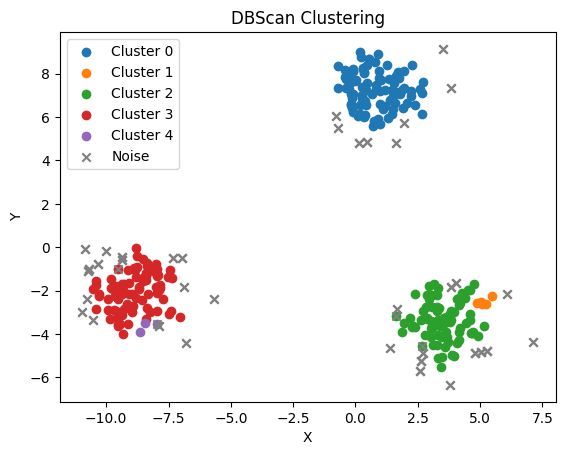

([[(-0.19854941097677026, 6.593721126491388),
   (-0.0871290941506715, 6.250127271349225),
   (-0.13948989065202655, 6.885454852859221),
   (-0.08314165377310112, 7.067654097484334),
   (0.16717425531939367, 6.532567359912049),
   (-0.16820671583834312, 7.080611526708988),
   (-0.16415792855289402, 6.56645672780152),
   (-0.14087731025406036, 6.437438907368296),
   (0.16261837286895142, 6.123977109102774),
   (0.09092957991810813, 6.114135977388826),
   (0.322995650160367, 6.003331450006278),
   (0.08831868407242083, 6.06607271613951),
   (-0.2511270135823256, 7.307011112672857),
   (0.26339093190904095, 6.917182954281554),
   (0.26407173252140703, 7.02682507491503),
   (0.2528781041236102, 6.8867081098680965),
   (0.25081691192118116, 7.374934981826996),
   (-0.4007104634535019, 7.351752129479812),
   (0.40859010673177654, 6.534690770136499),
   (0.37418359461249995, 6.748457110048478),
   (0.39273813720170825, 6.08370993941255),
   (0.7610594490252485, 5.823779877583936),
   (-0.7081

In [920]:
def DBSCAN(data, eps, minPts):

    visited = set()
    noise = []
    all_core = []

    # Iterate over each point in the dataset
    for p in data:
      # Check if the point has been visited
        if tuple(p) not in visited:
            visited.add(tuple(p))# Mark the point as visited

            neighbours = get_neighbours(data, p, eps) # Find neighbors of the current point within epsilon distance
            # Check if the current point is a noise point
            if len(neighbours) < minPts:
                noise.extend(neighbours)#add noise points to the noise list
                continue
            else:
              #initialize a new core cluster with the current point
                new_core = [(p[0], p[1])]
                neighbours.remove((p[0], p[1]))

                seedset = neighbours
                while seedset:
                    q = seedset.pop(0)
                    # Check if neighbor is noise point or no
                    if tuple(q) in noise:
                        noise.remove(tuple(q))
                        new_core.append((q[0], q[1]))

                    # Check if the neighbor has not been visited
                    if tuple(q) not in visited:
                        visited.add(tuple(q))
                        new_core.append((q[0], q[1]))
                        neighbours = get_neighbours(data, q, eps)

                        #check if neighbor has enough neighbors to be a core point
                        if len(neighbours) >= minPts:
                            seedset.extend(neighbours)

                all_core.append(new_core)
    # Plot clusters and noise points
    plot_dbscan(all_core, noise)
    return all_core, noise

# Apply DBScan to blobs dataset
eps_blobs = 0.5
minPts_blobs = 5
DBSCAN(X_blobs, eps_blobs, minPts_blobs)

